In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define color palette
colors = ['#001c71', '#636466', '#5673b8', '#39bb9d', '#846aaf', '#852166']

# Load the Excel file
file_path = r'C:\Users\dharris\OneDrive - Jazzpharma.com\Project\Jazz.ISStrategy\Workforce Planning\CW and MSP Data.xlsx'  # Update with your file path
data = pd.ExcelFile(file_path)

# Load the data from the first sheet
sheet_data = pd.read_excel(file_path, sheet_name='Sheet1')

In [3]:
# Extract relevant data
workforce_data = {
    'Full-Time Employees': int(sheet_data.iloc[0, 1]),
    'Contingent Workers': int(sheet_data.iloc[1, 1])
}

provider_metrics = {
    'Managed Service Providers': int(sheet_data.iloc[3, 1]),
    'Professional Service Providers': int(sheet_data.iloc[4, 1]),
    'MSP Resources': int(sheet_data.iloc[7, 1]),
    'PSP Resources': int(sheet_data.iloc[8, 1])
}

In [4]:
# Extract detailed MSP data
msp_data = sheet_data.iloc[15:34, [0, 1, 2, 3, 4]]
msp_data.columns = ['Partner', 'Resource Count', 'Managed Services Scope', 'Strategic Alignment', 'Spend']
msp_data.dropna(inplace=True)
msp_data = msp_data[msp_data['Resource Count'] != 'TBC']
msp_data = msp_data[msp_data['Spend'] != 'TBC']
msp_data['Resource Count'] = msp_data['Resource Count'].astype(int)
msp_data['Spend'] = msp_data['Spend'].astype(int)

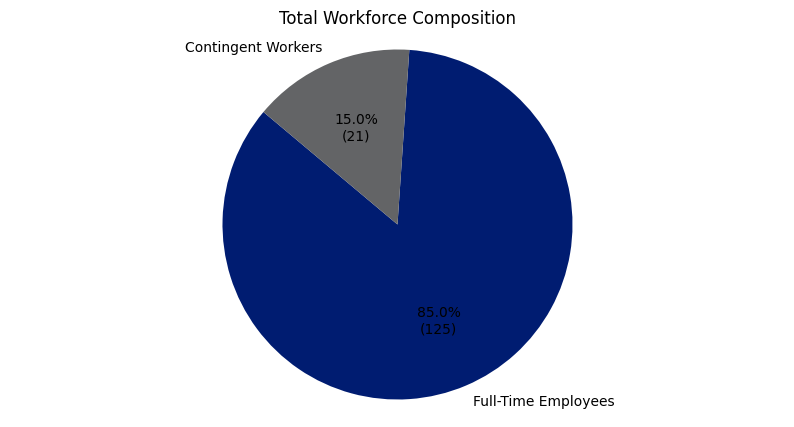

In [5]:
# Pie Chart for Workforce Composition
plt.figure(figsize=(10, 5))

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(workforce_data.values(), labels=workforce_data.keys(), autopct=lambda pct: func(pct, list(workforce_data.values())), startangle=140, colors=colors[:2])
plt.title('Total Workforce Composition')
plt.axis('equal')
plt.savefig('workforce_composition.png')
plt.show()

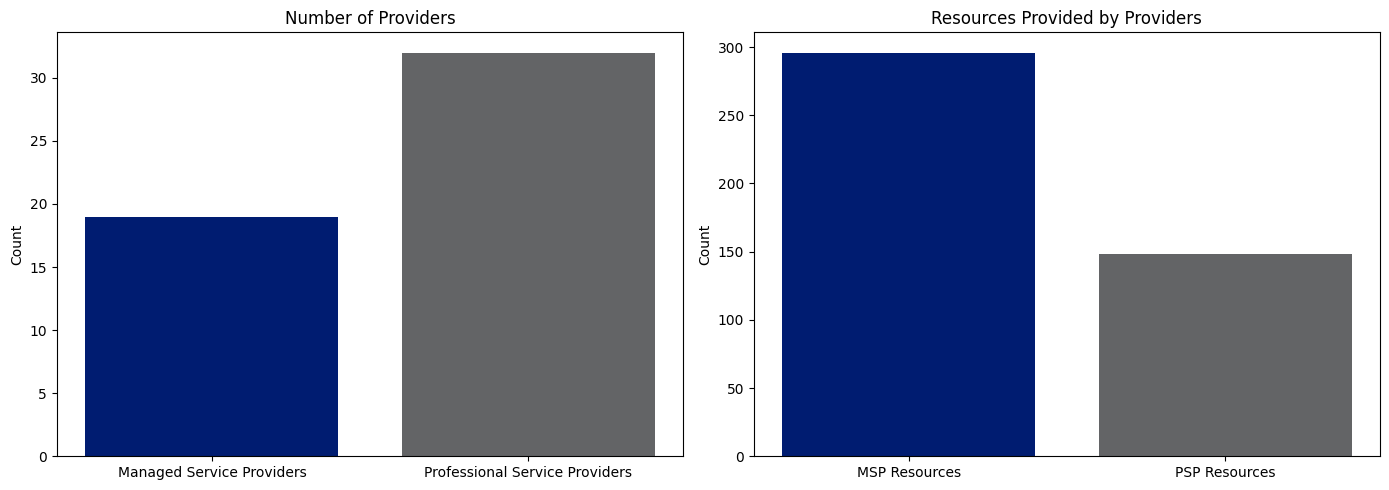

In [6]:
# Bar Chart for Provider Metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].bar(list(provider_metrics.keys())[:2], list(provider_metrics.values())[:2], color=colors[:2])
ax[0].set_title('Number of Providers')
ax[0].set_ylabel('Count')

ax[1].bar(list(provider_metrics.keys())[2:], list(provider_metrics.values())[2:], color=colors[:2])
ax[1].set_title('Resources Provided by Providers')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('provider_metrics.png')
plt.show()

C:\Users\dharris\AppData\Local\Temp\ipykernel_32332\1643311773.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees


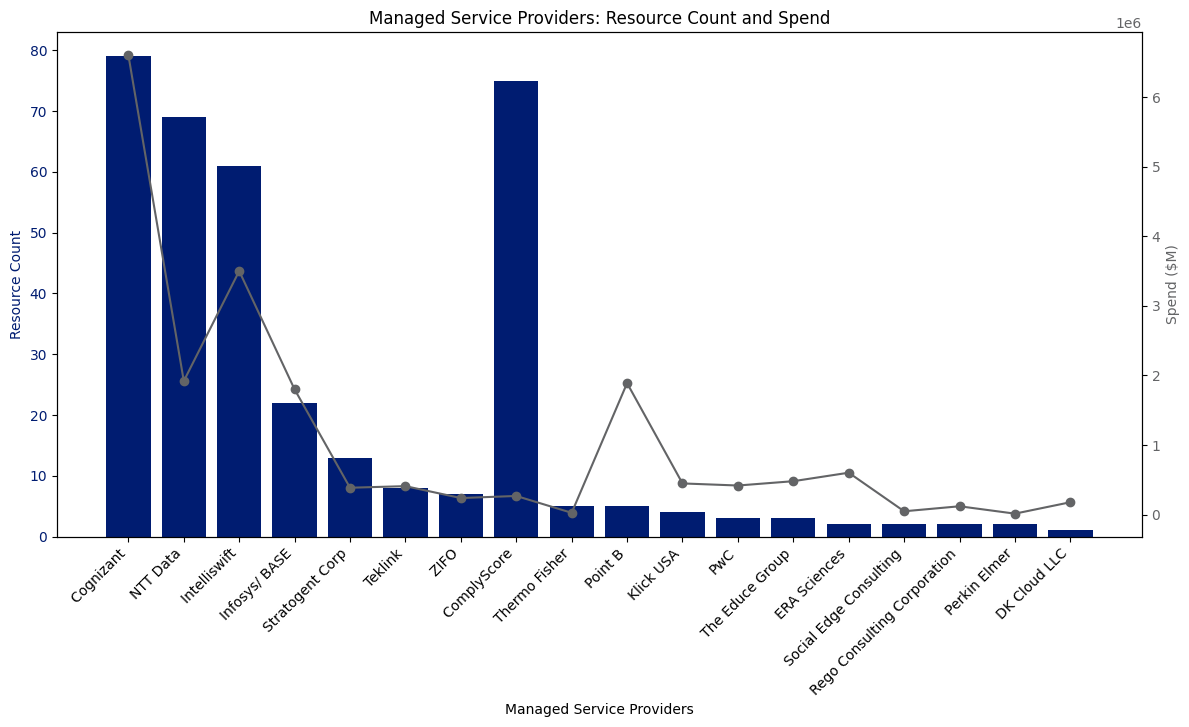

In [7]:
# Bar Chart for MSP Spend and Resource Count with Strategic Alignment
fig, ax1 = plt.subplots(figsize=(12, 6))

color = colors[0]
ax1.set_xlabel('Managed Service Providers')
ax1.set_ylabel('Resource Count', color=color)
bars = ax1.bar(msp_data['Partner'], msp_data['Resource Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = colors[1]
ax2.set_ylabel('Spend ($M)', color=color)
ax2.plot(msp_data['Partner'], msp_data['Spend'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Managed Service Providers: Resource Count and Spend')
fig.tight_layout()  # Adjust the layout first
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees
plt.savefig('msp_resource_spend.png')
plt.show()

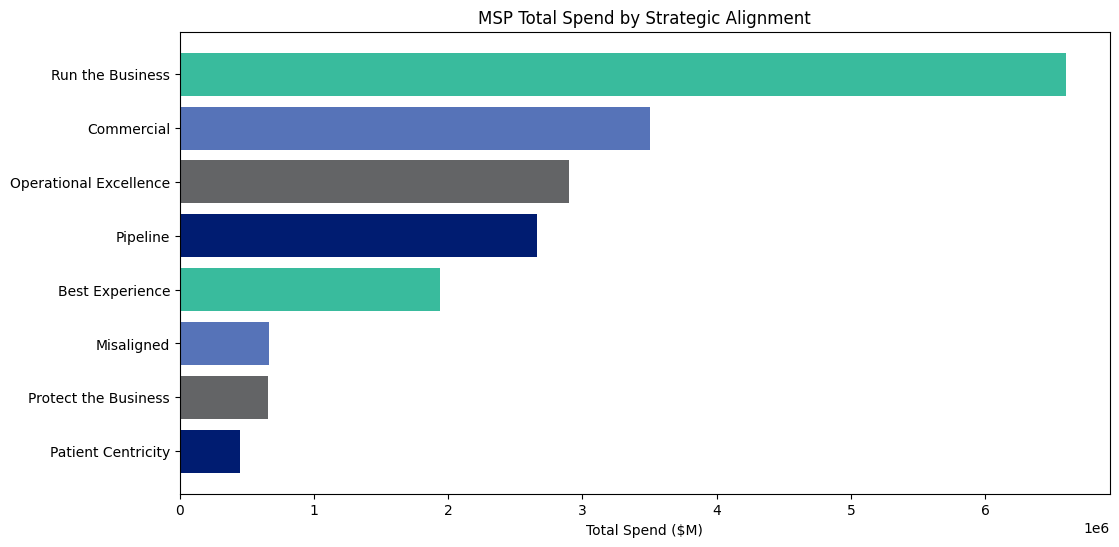

In [8]:
# Additional Bar Chart for Strategic Alignment and Spend
strategic_alignment_spend = msp_data.groupby('Strategic Alignment')['Spend'].sum().sort_values()

plt.figure(figsize=(12, 6))
plt.barh(strategic_alignment_spend.index, strategic_alignment_spend.values, color=colors[:4])
plt.xlabel('Total Spend ($M)')
plt.title('MSP Total Spend by Strategic Alignment')
plt.savefig('strategic_alignment_spend.png')
plt.show()

In [9]:
# Display the updated MSP Overview Table
print(msp_data)

                        Partner  Resource Count  \
15                   Cognizant​              79   
16                    NTT​ Data              69   
17                Intelliswift​              61   
18               Infosys/ BASE​              22   
19              Stratogent Corp              13   
20                      Teklink               8   
21                        ZIFO​               7   
22                 ComplyScore​              75   
23                Thermo Fisher               5   
24                     Point B​               5   
25                   Klick USA​               4   
26                          PwC               3   
27              The Educe Group               3   
28                ERA Sciences​               2   
29       Social Edge Consulting               2   
30  Rego Consulting Corporation               2   
31                 Perkin Elmer               2   
32                 DK Cloud LLC               1   

                              

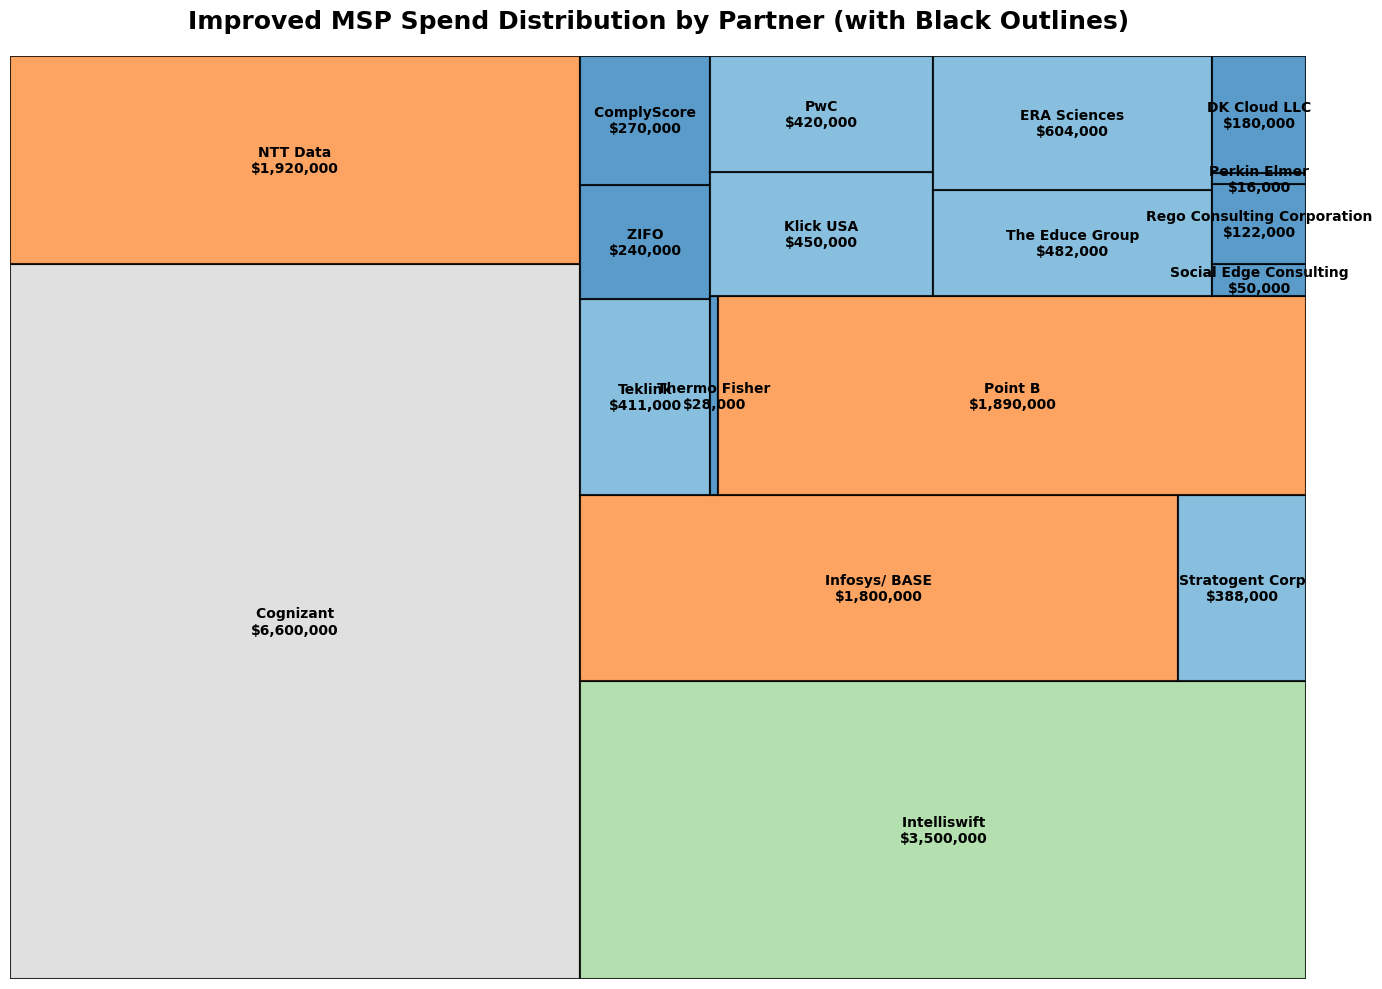

In [16]:
import matplotlib.pyplot as plt
import squarify

# Improved Treemap for MSP Spend by Partner with Black Outlines
plt.figure(figsize=(14, 10))
colors = plt.cm.tab20c(msp_data['Spend'] / msp_data['Spend'].max())  # Use a distinct color palette

# Create treemap with black outlines
squarify.plot(
    sizes=msp_data['Spend'],
    label=[f"{partner}\n${spend:,}" for partner, spend in zip(msp_data['Partner'], msp_data['Spend'])],
    color=colors,
    alpha=0.8,
    edgecolor='black',  # Add black outlines
    linewidth=1.5,  # Set the width of the outlines
    text_kwargs={'fontsize': 10, 'weight': 'bold'}
)

# Title and Layout Adjustments
plt.title('Improved MSP Spend Distribution by Partner (with Black Outlines)', fontsize=18, weight='bold', pad=20)
plt.axis('off')  # Hide axis
plt.tight_layout()

# Show plot
plt.show()


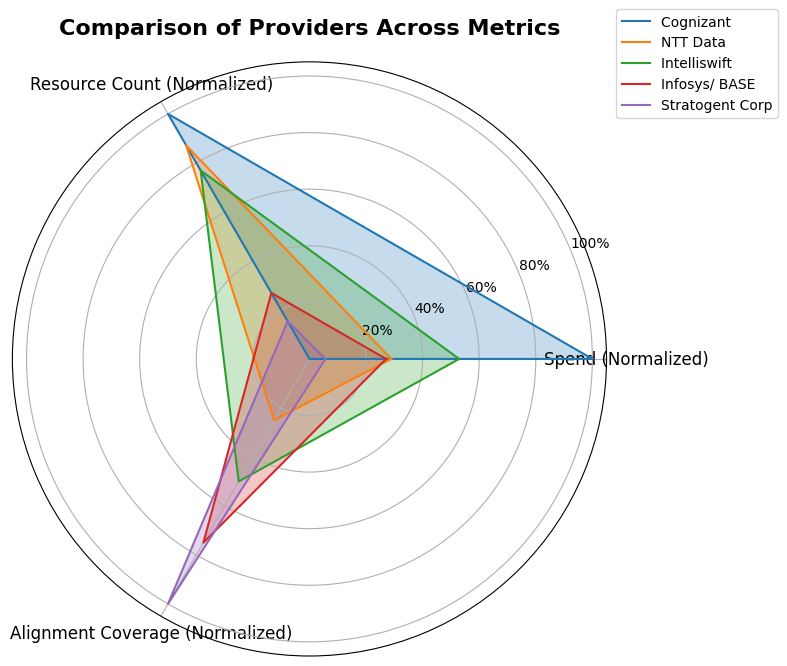

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize the data for comparison (0-1 range)
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Add a new column for Strategic Alignment Coverage (Example metric)
msp_data['Strategic Alignment Coverage'] = msp_data['Strategic Alignment'].map({
    'Run the Business': 1,
    'Operational Excellence': 2,
    'Commercial': 3,
    'Pipeline': 4,
    'Protect the Business': 5
})  # Assign example values for strategic alignments

# Normalize the columns for radar chart
msp_data['Spend (Normalized)'] = normalize(msp_data['Spend'])
msp_data['Resource Count (Normalized)'] = normalize(msp_data['Resource Count'])
msp_data['Alignment Coverage (Normalized)'] = normalize(msp_data['Strategic Alignment Coverage'])

# Select providers to include in the radar chart
selected_providers = msp_data.head(5)  # Use the first 5 providers as an example
categories = ['Spend (Normalized)', 'Resource Count (Normalized)', 'Alignment Coverage (Normalized)']
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each provider
for _, row in selected_providers.iterrows():
    values = row[categories].values.tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=row['Partner'])
    ax.fill(angles, values, alpha=0.25)

# Add labels for each axis
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"], fontsize=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.title('Comparison of Providers Across Metrics', fontsize=16, weight='bold', pad=20)

# Show plot
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import plotly.express as px

# Sample data for MSP
# Ensure msp_data is cleaned and includes the relevant columns
msp_data_hierarchy = msp_data[['Strategic Alignment', 'Partner', 'Spend']].copy()

# Create the Sunburst Chart
fig = px.sunburst(
    msp_data_hierarchy,
    path=['Strategic Alignment', 'Partner'],  # Hierarchical path: Strategic Alignment -> Partner
    values='Spend',  # Size of the segments based on Spend
    color='Spend',  # Color intensity based on Spend
    color_continuous_scale='Viridis',  # Color scale
    title='MSP Spend Distribution by Strategic Alignment and Partner',
    height=800
)

# Customize the layout
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title_font=dict(size=20),
)

# Show the chart
fig.show()


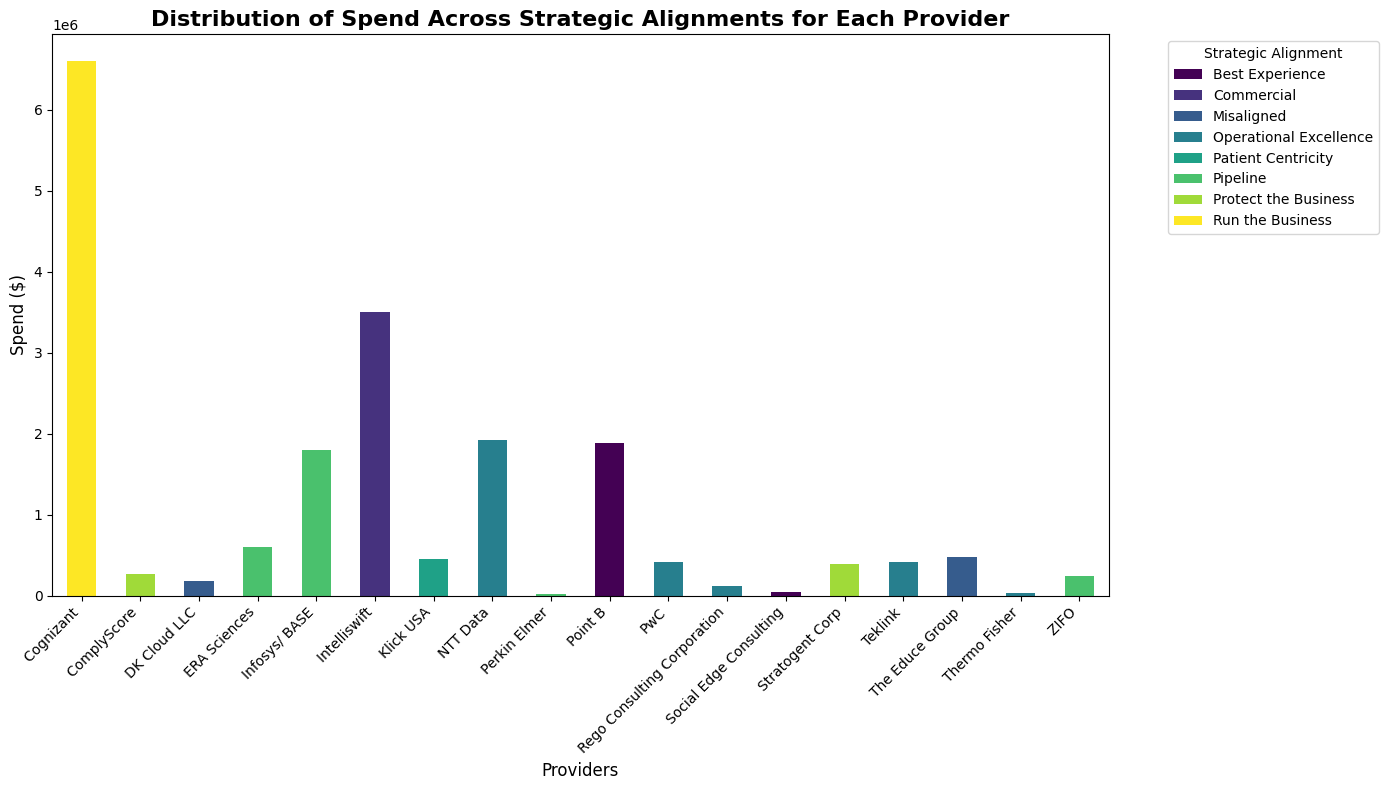

In [20]:
import matplotlib.pyplot as plt

# Preparing the data for a stacked bar chart
stacked_data = msp_data.groupby(['Partner', 'Strategic Alignment'])['Spend'].sum().unstack(fill_value=0)

# Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Customizing the plot
plt.title('Distribution of Spend Across Strategic Alignments for Each Provider', fontsize=16, weight='bold')
plt.xlabel('Providers', fontsize=12)
plt.ylabel('Spend ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Strategic Alignment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()



C:\Users\dharris\AppData\Local\Temp\ipykernel_32332\3012581473.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



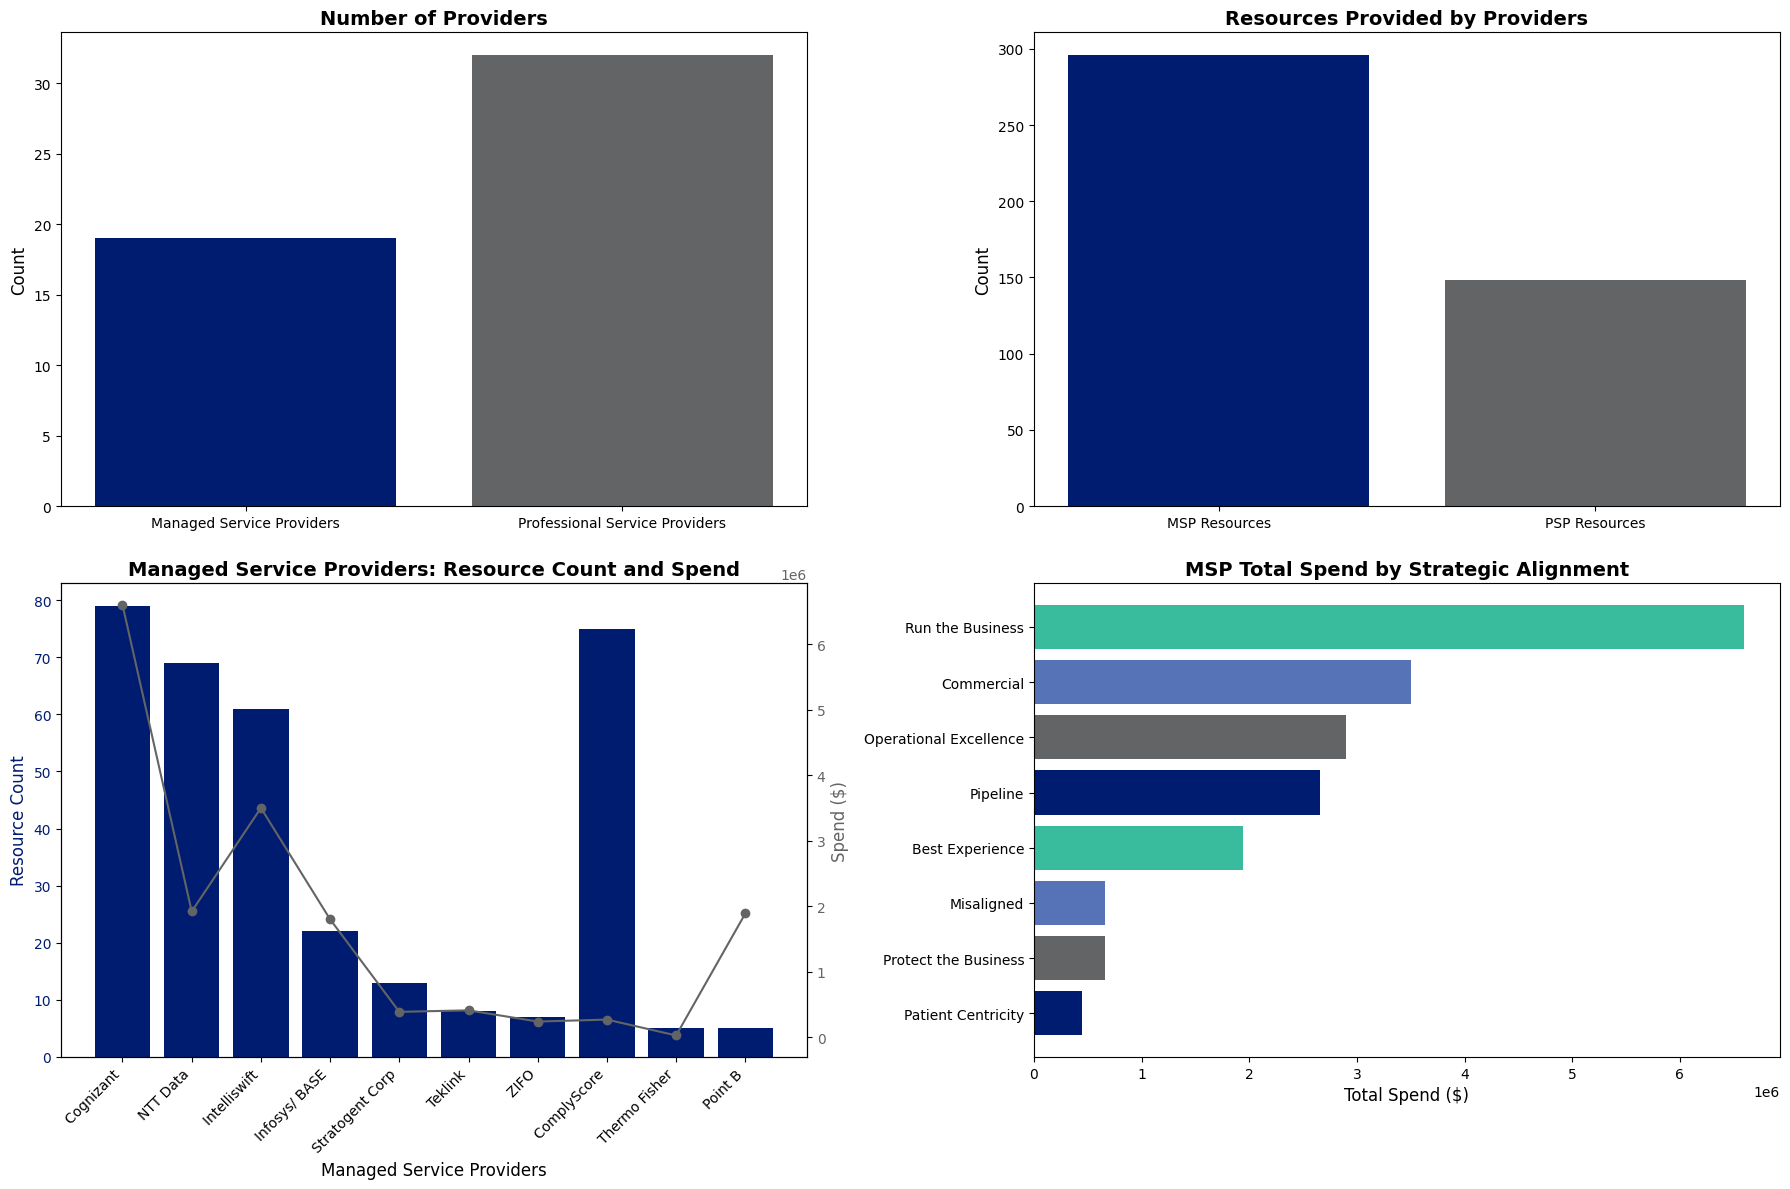

In [21]:
import matplotlib.pyplot as plt

# Setting up the dashboard layout (2x2 visual grid)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# #1:1 - Bar Chart for Provider Metrics
colors = ['#001c71', '#636466', '#5673b8', '#39bb9d', '#846aaf', '#852166']

provider_metrics = {
    'Managed Service Providers': 19,
    'Professional Service Providers': 32,
    'MSP Resources': 296,
    'PSP Resources': 148
}

axes[0, 0].bar(list(provider_metrics.keys())[:2], list(provider_metrics.values())[:2], color=colors[:2])
axes[0, 0].set_title('Number of Providers', fontsize=14, weight='bold')
axes[0, 0].set_ylabel('Count', fontsize=12)

axes[0, 1].bar(list(provider_metrics.keys())[2:], list(provider_metrics.values())[2:], color=colors[:2])
axes[0, 1].set_title('Resources Provided by Providers', fontsize=14, weight='bold')
axes[0, 1].set_ylabel('Count', fontsize=12)

# #2:1 - Bar Chart for MSP Spend and Resource Count with Strategic Alignment
msp_data_sample = msp_data.head(10)  # Limiting data for example clarity
ax1 = axes[1, 0]
color = colors[0]
ax1.set_xlabel('Managed Service Providers', fontsize=12)
ax1.set_ylabel('Resource Count', color=color, fontsize=12)
bars = ax1.bar(msp_data_sample['Partner'], msp_data_sample['Resource Count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = colors[1]
ax2.set_ylabel('Spend ($)', color=color, fontsize=12)
ax2.plot(msp_data_sample['Partner'], msp_data_sample['Spend'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(msp_data_sample['Partner'], rotation=45, ha='right', fontsize=10)
ax1.set_title('Managed Service Providers: Resource Count and Spend', fontsize=14, weight='bold')

# #2:2 - Additional Bar Chart for Strategic Alignment and Spend
strategic_alignment_spend = msp_data.groupby('Strategic Alignment')['Spend'].sum().sort_values()
axes[1, 1].barh(strategic_alignment_spend.index, strategic_alignment_spend.values, color=colors[:4])
axes[1, 1].set_xlabel('Total Spend ($)', fontsize=12)
axes[1, 1].set_title('MSP Total Spend by Strategic Alignment', fontsize=14, weight='bold')

# Tighten layout and display
plt.tight_layout()
plt.show()


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Sample data for Sunburst Chart
msp_data_hierarchy = msp_data[['Strategic Alignment', 'Partner', 'Spend']].copy()

# Create the Sunburst Chart
fig = px.sunburst(
    msp_data_hierarchy,
    path=['Strategic Alignment', 'Partner'],  # Hierarchical path
    values='Spend',  # Segment size
    color='Spend',  # Color intensity
    color_continuous_scale='Viridis',
    title='MSP Spend Distribution by Strategic Alignment and Partner'
)

# Save the Sunburst Chart as a static image
sunburst_path = "/mnt/data/sunburst_chart.png"
pio.write_image(fig, sunburst_path, format='png', width=800, height=600)

# Load the saved Sunburst Chart into the Matplotlib dashboard
sunburst_img = plt.imread(sunburst_path)

# Setting up the dashboard layout (3 rows x 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# #1:1 - Bar Chart for Provider Metrics
provider_metrics = {
    'Managed Service Providers': 19,
    'Professional Service Providers': 32,
    'MSP Resources': 296,
    'PSP Resources': 148
}
axes[0, 0].bar(list(provider_metrics.keys())[:2], list(provider_metrics.values())[:2], color=['#001c71', '#636466'])
axes[0, 0].set_title('Number of Providers', fontsize=14, weight='bold')
axes[0, 0].set_ylabel('Count', fontsize=12)

axes[0, 1].bar(list(provider_metrics.keys())[2:], list(provider_metrics.values())[2:], color=['#001c71', '#636466'])
axes[0, 1].set_title('Resources Provided by Providers', fontsize=14, weight='bold')
axes[0, 1].set_ylabel('Count', fontsize=12)

# #1:3 - Add Sunburst Chart (Static Image)
axes[1, 0].imshow(sunburst_img)
axes[1, 0].axis('off')  # Hide axis for the Sunburst image
axes[1, 0].set_title('Sunburst: MSP Spend by Alignment and Partner', fontsize=14, weight='bold')

# #2:1 - Bar Chart for Strategic Alignment and Spend
strategic_alignment_spend = msp_data.groupby('Strategic Alignment')['Spend'].sum().sort_values()
axes[1, 1].barh(strategic_alignment_spend.index, strategic_alignment_spend.values, color=['#5673b8', '#39bb9d', '#846aaf', '#852166'])
axes[1, 1].set_xlabel('Total Spend ($)', fontsize=12)
axes[1, 1].set_title('MSP Total Spend by Strategic Alignment', fontsize=14, weight='bold')

# Adjust layout and show
plt.tight_layout()
plt.show()


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
